# LAB07: Answering Business Question

### Apache Spark Preparation

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz 
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

### Download stg_youtube

In [6]:
!wget https://www.dropbox.com/s/i2rjdae18k8fd0j/stg_youtube.csv 

--2020-03-12 13:20:12--  https://www.dropbox.com/s/i2rjdae18k8fd0j/stg_youtube.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/i2rjdae18k8fd0j/stg_youtube.csv [following]
--2020-03-12 13:20:12--  https://www.dropbox.com/s/raw/i2rjdae18k8fd0j/stg_youtube.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf5090248935fff2fdadee74a9a.dl.dropboxusercontent.com/cd/0/inline/AzzrPoPAJiioSDbDI55m_k2KGtI4p8-7dPZCTguUoWkBocqusZyREqQ_1eiwS6TiEtK7YzNfCmMVWRYCi__iTfURQwqdBelx_nyA2JANLCE4Hth_q7D5nAVKsJUVqxA4JUg/file# [following]
--2020-03-12 13:20:12--  https://ucf5090248935fff2fdadee74a9a.dl.dropboxusercontent.com/cd/0/inline/AzzrPoPAJiioSDbDI55m_k2KGtI4p8-7dPZCTguUoWkBocqusZyREqQ_1eiwS6TiEtK7YzNfCmMVWRYCi__iTfURQwqdBelx_nyA2JANL

In [7]:
!ls

sample_data		   spark-2.4.5-bin-hadoop2.7.tgz
spark-2.4.5-bin-hadoop2.7  stg_youtube.csv


### Download video_category

In [8]:
!wget https://www.dropbox.com/s/b7wut6mj9wpfyi1/video_category.dat

--2020-03-12 13:20:56--  https://www.dropbox.com/s/b7wut6mj9wpfyi1/video_category.dat
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/b7wut6mj9wpfyi1/video_category.dat [following]
--2020-03-12 13:20:56--  https://www.dropbox.com/s/raw/b7wut6mj9wpfyi1/video_category.dat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca0d68ef9fa8f56e41c194edaf7.dl.dropboxusercontent.com/cd/0/inline/AzxGnvZV1_oxuQbnphgB-eciV1kc_wWZ7NFjO9cLc4A8VLTjgcAeSvd-H-Mm1XjS2UakK4SXxfcctllmxuzaBsbZKoJArn-zBzLB-C9iBTCTaRF3G8rS40l_GJJdkTfyTnY/file# [following]
--2020-03-12 13:20:56--  https://uca0d68ef9fa8f56e41c194edaf7.dl.dropboxusercontent.com/cd/0/inline/AzxGnvZV1_oxuQbnphgB-eciV1kc_wWZ7NFjO9cLc4A8VLTjgcAeSvd-H-Mm1XjS2UakK4SXxfcctllmxuzaBsbZKoJArn-z

In [9]:
!ls

sample_data		   spark-2.4.5-bin-hadoop2.7.tgz  video_category.dat
spark-2.4.5-bin-hadoop2.7  stg_youtube.csv


### Get SPARK Version

In [10]:
print("Spark version : " + spark.version)

Spark version : 2.4.5


In [11]:
import sys
print("Python version : " + sys.version)

Python version : 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


### Test SPARK

In [14]:
from pyspark.context import SparkContext
import random

sc = SparkContext.getOrCreate()
def inside(p):
    x, y = random.random(), random.random()
    return x*x + y*y < 1

NUM_SAMPLES =100000
count = sc.parallelize(range(0, NUM_SAMPLES)) \
             .filter(inside).count()

print ("Pi is roughly " + str((4.0 * count / NUM_SAMPLES)))

Pi is roughly 3.14856


### Read youtube dataset and converted into SPARK dataframe

In [15]:
from pyspark.sql.types import *

file_path = "stg_youtube.csv"
youtube_schema=StructType([
    StructField("video_id", StringType(), True),
    StructField("trending_date", IntegerType(), True),
    StructField("title", StringType(), True),
    StructField("channel_title", StringType(), True),
    StructField("category_id", IntegerType(), True),
    StructField("publish_time", StringType(), True),
    StructField("tags", StringType(), True),
    StructField("views", IntegerType(), True),
    StructField("likes", IntegerType(), True),
    StructField("dislikes", IntegerType(), True),
    StructField("comment_count", IntegerType(), True)
])


df_youtube = spark.read \
 .option("delimiter", "\t") \
 .schema(youtube_schema) \
 .option("inferSchema", "True") \
 .csv(file_path)

print ("Total Records: " + str( df_youtube.count()))
df_youtube.show(3, truncate=True)

Total Records: 40949
+-----------+-------------+--------------------+---------------+-----------+--------------------+--------------------+-------+------+--------+-------------+
|   video_id|trending_date|               title|  channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|
+-----------+-------------+--------------------+---------------+-----------+--------------------+--------------------+-------+------+--------+-------------+
|2kyS6SvSYSE|       171114|WE WANT TO TALK A...|   CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|
|1ZAPwfrtAFY|       171114|The Trump Preside...|LastWeekTonight|         24|2017-11-13T07:30:...|last week tonight...|2418783| 97185|    6146|        12703|
|5qpjK5DgCt4|       171114|Racist Superman |...|   Rudy Mancuso|         23|2017-11-12T19:05:...|racist superman"|...|3191434|146033|    5339|         8181|
+-----------+-------------+----------

In [16]:
file_path = "video_category.dat"
youtube_vd_cat_schema=StructType([
    StructField("category_id", IntegerType(), True),
    StructField("category_name", StringType(), True),
])


youtube_video_cat = spark.read \
 .option("delimiter", "|") \
 .schema(youtube_vd_cat_schema) \
 .option("inferSchema", "True") \
 .csv(file_path)

print ("Total Records: " + str( youtube_video_cat.count()))
youtube_video_cat.show(5, truncate=True)

Total Records: 32
+-----------+----------------+
|category_id|   category_name|
+-----------+----------------+
|          1|Film & Animation|
|          2|Autos & Vehicles|
|         10|           Music|
|         15|  Pets & Animals|
|         17|          Sports|
+-----------+----------------+
only showing top 5 rows



In [17]:
df_youtube.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: integer (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)



### SELECT * FROM youtube LIMIT 10

In [18]:
df_youtube.show(5, truncate=True)

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+
|2kyS6SvSYSE|       171114|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|
|1ZAPwfrtAFY|       171114|The Trump Preside...|     LastWeekTonight|         24|2017-11-13T07:30:...|last week tonight...|2418783| 97185|    6146|        12703|
|5qpjK5DgCt4|       171114|Racist Superman |...|        Rudy Mancuso|         23|2017-11-12T19:05:...|racist superman"|...|3191434|146033|    5339|         8181|
|puqaWrEC7tY|       171114|N

### Join table

In [19]:
df_youtube_full = df_youtube.join(youtube_video_cat, on=['category_id'], how='inner')

df_youtube_full.show(5)

+-----------+-----------+-------------+--------------------+--------------------+--------------------+--------------------+-------+------+--------+-------------+--------------+
|category_id|   video_id|trending_date|               title|       channel_title|        publish_time|                tags|  views| likes|dislikes|comment_count| category_name|
+-----------+-----------+-------------+--------------------+--------------------+--------------------+--------------------+-------+------+--------+-------------+--------------+
|         22|2kyS6SvSYSE|       171114|WE WANT TO TALK A...|        CaseyNeistat|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|People & Blogs|
|         24|1ZAPwfrtAFY|       171114|The Trump Preside...|     LastWeekTonight|2017-11-13T07:30:...|last week tonight...|2418783| 97185|    6146|        12703| Entertainment|
|         23|5qpjK5DgCt4|       171114|Racist Superman |...|        Rudy Mancuso|2017-11-12T19:05:...|racist superm

In [20]:
print ("Total Records: " + str( df_youtube.count()))
print("Number of Columns: " + str(len(df_youtube.columns)))

Total Records: 40949
Number of Columns: 11


In [21]:
print ("Total Records: " + str( df_youtube_full.count()))
print("Number of Columns: " + str(len(df_youtube_full.columns)))

Total Records: 40949
Number of Columns: 12


In [22]:
df_youtube.describe('category_id').show()

+-------+-----------------+
|summary|      category_id|
+-------+-----------------+
|  count|            40949|
|   mean|19.97242911914821|
| stddev|7.568326828280453|
|    min|                1|
|    max|               43|
+-------+-----------------+



In [23]:
df_youtube.describe('views').show()

+-------+------------------+
|summary|             views|
+-------+------------------+
|  count|             40949|
|   mean|2360784.6382573447|
| stddev|  7394113.75970395|
|    min|               549|
|    max|         225211923|
+-------+------------------+



In [24]:
df_youtube.describe('views').toPandas()

,summary,views
0,count,40949
1,mean,2360784.6382573447
2,stddev,7394113.75970395
3,min,549
4,max,225211923


### SELECT trending_date, video_id, channel_title FROM youtube LIMIT 5

In [25]:
df_youtube.select("trending_date", "video_id", "channel_title").show(5)

+-------------+-----------+--------------------+
|trending_date|   video_id|       channel_title|
+-------------+-----------+--------------------+
|       171114|2kyS6SvSYSE|        CaseyNeistat|
|       171114|1ZAPwfrtAFY|     LastWeekTonight|
|       171114|5qpjK5DgCt4|        Rudy Mancuso|
|       171114|puqaWrEC7tY|Good Mythical Mor...|
|       171114|d380meD0W0M|            nigahiga|
+-------------+-----------+--------------------+
only showing top 5 rows



### SELECT trending_date, count(1) num_video FROM youtube GROUP BY trending_date ORDER By trending_date DESC

In [26]:
from pyspark.sql.functions import col

df = df_youtube \
        .groupBy("trending_date") \
        .count() \
        .orderBy('trending_date', ascending=False) \
        .select(col("trending_date"), col("count").alias("num_video"))


df.show()

+-------------+---------+
|trending_date|num_video|
+-------------+---------+
|       180614|      200|
|       180613|      200|
|       180612|      200|
|       180611|      200|
|       180610|      200|
|       180609|      200|
|       180608|      200|
|       180607|      200|
|       180606|      200|
|       180605|      200|
|       180604|      200|
|       180603|      200|
|       180602|      200|
|       180601|      200|
|       180531|      200|
|       180530|      200|
|       180529|      200|
|       180528|      200|
|       180527|      200|
|       180526|      200|
+-------------+---------+
only showing top 20 rows



In [27]:
df.toPandas()

,trending_date,num_video
0,180614,200
1,180613,200
2,180612,200
3,180611,200
4,180610,200
...,...,...
200,171118,200
201,171117,200
202,171116,200
203,171115,200


### What category have most views ?


In [0]:
SELECT 
 category_id,
 sum(views) total_views,
 avg(views) avg_views
FROM <user>.stg_youtube
GROUP BY category_id

### Most views category in dataframe

In [28]:
from pyspark.sql import functions as F

result = df_youtube \
        .groupBy("category_id") \
        .agg( \
            F.sum(col('views')).alias('total_views'), \
            F.avg(col('views')).alias('avg_views'), \
            F.count(F.lit(1)).alias('num_video') \
            ) \
        .orderBy('total_views', ascending=False) 
        
        
result.toPandas()

,category_id,total_views,avg_views,num_video
0,10,40132892190,6.201003e+06,6472
1,24,20604388195,2.067883e+06,9964
2,1,7284156721,3.106250e+06,2345
3,23,5117426208,1.480308e+06,3457
4,22,4917191726,1.531835e+06,3210
5,17,4404456673,2.025969e+06,2174
6,26,4078545064,9.837301e+05,4146
7,28,3487756816,1.452627e+06,2401
8,20,2141218625,2.620831e+06,817
9,25,1473765704,5.925877e+05,2487


In [30]:
result = df_youtube_full \
        .groupBy("category_name") \
        .agg( \
            F.sum(col('views')).alias('total_views'), \
            F.avg(col('views')).alias('avg_views'), \
            F.count(F.lit(1)).alias('num_video') \
            ) \
        .orderBy('total_views', ascending=False) 
        
result.toPandas()

,category_name,total_views,avg_views,num_video
0,Music,40132892190,6.201003e+06,6472
1,Entertainment,20604388195,2.067883e+06,9964
2,Film & Animation,7284156721,3.106250e+06,2345
3,Comedy,5117426208,1.480308e+06,3457
4,People & Blogs,4917191726,1.531835e+06,3210
5,Sports,4404456673,2.025969e+06,2174
6,Howto & Style,4078545064,9.837301e+05,4146
7,Science & Technology,3487756816,1.452627e+06,2401
8,Gaming,2141218625,2.620831e+06,817
9,News & Politics,1473765704,5.925877e+05,2487


### Most views category in SPARK SQL

In [34]:
df_youtube_full.createOrReplaceTempView("youtube")
df2 = spark.sql("SELECT category_name, \
                             sum(views) as total_views, \
                             avg(views) as avg_views, \
                             count(1) as num_video \
                      FROM youtube \
                      GROUP BY category_name \
                      ORDER BY total_views DESC")
df2.show()

+--------------------+-----------+------------------+---------+
|       category_name|total_views|         avg_views|num_video|
+--------------------+-----------+------------------+---------+
|               Music|40132892190| 6201003.119592089|     6472|
|       Entertainment|20604388195|2067883.1990164593|     9964|
|    Film & Animation| 7284156721|3106250.2008528784|     2345|
|              Comedy| 5117426208| 1480308.420017356|     3457|
|      People & Blogs| 4917191726| 1531835.428660436|     3210|
|              Sports| 4404456673|2025969.0308187671|     2174|
|       Howto & Style| 4078545064| 983730.1167390256|     4146|
|Science & Technology| 3487756816|1452626.7455226989|     2401|
|              Gaming| 2141218625| 2620830.630354957|      817|
|     News & Politics| 1473765704| 592587.7378367512|     2487|
|           Education| 1180629990| 712940.8152173914|     1656|
|      Pets & Animals|  764651989| 831143.4663043479|      920|
|    Autos & Vehicles|  520690717|135596

### Data Visualization in Seaborn

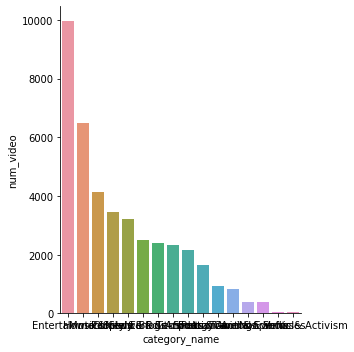

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df2 = spark.sql("SELECT category_name, count(1) as num_video \
                      FROM youtube \
                      GROUP BY category_name \
                      ORDER BY num_video DESC" \
                    )
result_pd_df = df2.toPandas()
sns.catplot(x='category_name', y='num_video', \
            data=result_pd_df, \
            order=result_pd_df['category_name'], \
            kind='bar')

Text(0.5, 1.0, 'Catogories of trend videos')

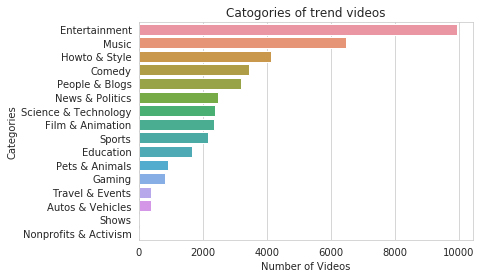

In [36]:
result_pd_df
## plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y='category_name',x='num_video', \
                 data=result_pd_df, \
                 orient='h' \
                )
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos")

In [38]:
df2 = spark.sql("SELECT video_id, count(1) as duration \
                      FROM youtube \
                      GROUP BY video_id \
                      ORDER BY duration DESC" \
                    )
result_pd_df = df2.toPandas()
result_pd_df.head(20)

,video_id,duration
0,j4KvrAUjn6c,30
1,MAjY8mCTXWk,29
2,QBL8IRJ5yHU,29
3,t4pRQ0jn23Q,29
4,NBSAQenU2Bk,29
5,iILJvqrAQ_w,29
6,8h--kFui1JA,29
7,r-3iathMo7o,29
8,UfKmSfgFxi8,28
9,vjSohj-Iclc,28


In [39]:
df2 = spark.sql("SELECT category_name, sum(likes) as total_likes, \
                             sum(dislikes) as total_dislikes, \
                             (sum(likes)/sum(dislikes)) as ratio \
                      FROM youtube \
                      GROUP BY category_name \
                      ORDER BY ratio DESC" \
                    )
                    
result_pd_df = df2.toPandas()
result_pd_df.head(20)

,category_name,total_likes,total_dislikes,ratio
0,Shows,1082639,24508,44.174922
1,Pets & Animals,19370702,527379,36.730135
2,Education,49257772,1351972,36.434018
3,Comedy,216346746,7230391,29.921860
4,Howto & Style,162880075,5473899,29.755769
5,Music,1416838584,51179008,27.683979
6,Film & Animation,165997476,6075148,27.324022
7,Sports,98621211,5133551,19.211110
8,People & Blogs,186615999,10187901,18.317414
9,Science & Technology,82532638,4548402,18.145414


Text(0.5, 1.0, 'Ratio like vs dislike video')

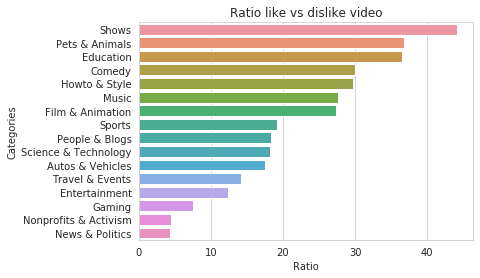

In [40]:
sns.set_style("whitegrid")
ax = sns.barplot(y='category_name',x='ratio', \
                 data=result_pd_df, \
                 orient='h' \
                )
plt.xlabel("Ratio")
plt.ylabel("Categories")
plt.title("Ratio like vs dislike video")